In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm 
from mpl_toolkits import mplot3d
import solvers

In [2]:
L=32
h = 0.25 ## grid spacing
N = 1 ## number of particles
N_g = int(L/h)
parameters = {'h':h, 'Lx':L, 'Ly':L, 'Lz':L, 'N':N, 'N_g':N_g, 'indexingConvention':'ij' }

In [3]:
sim = solvers.Stokes3D(parameters)

For a very dilute system $\phi \ll 1$, the velocity of the particle should simple be:

$$
V_0 = \frac{F}{6\pi\eta a}
$$

In [4]:
a=3
sim.volFrac(a)

par_pl = int(N_g/2)

r = np.array((sim.xx[par_pl], sim.xx[par_pl], sim.xx[par_pl]))
print(r)
F = np.array((0, 0, 1))
mu0 = 1/(6*np.pi*a)

sigma = a/(np.sqrt(3))
vx, vy, vz = sim.vCalc(a, sigma, r, F)  

print (sim.volFrac(a), vz/mu0)

[16.25 16.25 16.25]
0.0034514567727426926 0.7146598418772745


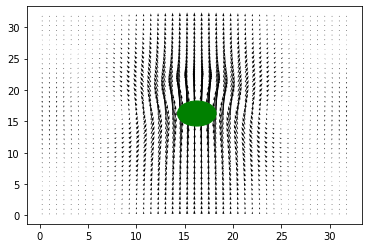

In [5]:
vx, vy, vz = sim.vCalc(a, sigma, r, F)

vx = np.array((sim.vx[:, par_pl, :].reshape(N_g, N_g)))
vz = np.array((sim.vz[:, par_pl, :].reshape(N_g, N_g)))
xx = np.array((sim.x[:, par_pl, :].reshape(N_g, N_g)))
zz = np.array((sim.z[:, par_pl, :].reshape(N_g, N_g)))

fig = plt.figure();  ax = fig.add_subplot()

s_i=3
plt.quiver(xx[::s_i,::s_i], zz[::s_i,::s_i], vx[::s_i,::s_i], vz[::s_i,::s_i])

# plot the particle
circle1 = plt.Circle((r[0], r[1]), radius=2, color='green'); ax.add_patch(circle1)


In [6]:
a = np.linspace(3,10,10)
cList = sim.volFrac(a)
vList = []
for i in range(len(a)):
    sigma =a[i]/ (np.sqrt(np.pi))
    mu0 = 1/(6*np.pi*a[i])
    vx, vy, vz = sim.vCalc(a[i], sigma, r, F)
    vList.append( vz/mu0 )

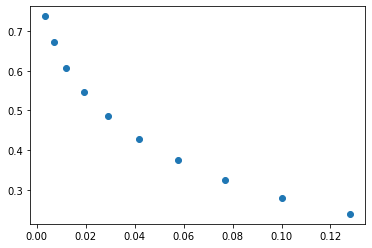

In [7]:
plt.plot(cList, vList, 'o')

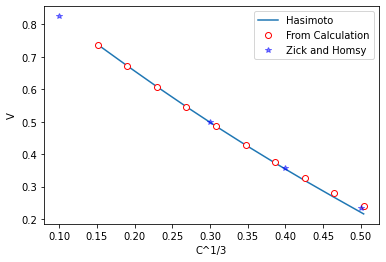

In [8]:
def analytical(c):
    return 1- 1.7601*np.power(c,1/3) + c - 1.5593*np.power(c,2)
analyticalVal = analytical(cList)
plt.plot(np.power(cList,1/3),analyticalVal, label = 'Hasimoto')
# plt.xlim((0,1))
plt.xlabel("C^1/3")
plt.ylabel("V")


phi = np.array([0.001, 0.027, 0.064,.125])#,.216,.343])
exR = [.825, .498, .356, .233]#, .134, .065]
plt.plot(np.power(cList,1/3), vList, 'o', mec='red', mfc='White', label = 'From Calculation' )
plt.plot(phi**(1/3), exR, '*',  lw =4, color="blue", label='Zick and Homsy', alpha=0.5)


plt.legend()

## plot fluid velocity


* Consider the XZ-plane
* Compute the vx-vz
* Essentially taking a slice of the above vectors at y = rp_y

In [9]:
i=1
a[i] = 2
sigma =a[i]/ (np.sqrt(np.pi))
mu0 = 1/(6*np.pi*a[i])


In [10]:
sim.x

array([[[ 0.25,  0.25,  0.25, ...,  0.25,  0.25,  0.25],
        [ 0.25,  0.25,  0.25, ...,  0.25,  0.25,  0.25],
        [ 0.25,  0.25,  0.25, ...,  0.25,  0.25,  0.25],
        ...,
        [ 0.25,  0.25,  0.25, ...,  0.25,  0.25,  0.25],
        [ 0.25,  0.25,  0.25, ...,  0.25,  0.25,  0.25],
        [ 0.25,  0.25,  0.25, ...,  0.25,  0.25,  0.25]],

       [[ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ],
        ...,
        [ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ],
        [ 0.5 ,  0.5 ,  0.5 , ...,  0.5 ,  0.5 ,  0.5 ]],

       [[ 0.75,  0.75,  0.75, ...,  0.75,  0.75,  0.75],
        [ 0.75,  0.75,  0.75, ...,  0.75,  0.75,  0.75],
        [ 0.75,  0.75,  0.75, ...,  0.75,  0.75,  0.75],
        ...,
        [ 0.75,  0.75,  0.75, ...,  0.75,  0.75,  0.75],
        [ 0.75,  0.75,  0.75, ...,  0.75,  0.